In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

2022-04-27 09:16:28.150107: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-27 09:16:28.150146: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
generator = keras.models.load_model('./datas/weights/msggan/cifar10/msgGeneratorCifar10.h5')
latent_dim = generator.input.shape[1]
print(f"Generator model loaded with latent dim: {latent_dim}")

2022-04-27 09:16:59.239124: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-27 09:16:59.239162: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-27 09:16:59.239196: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Inspiron-5558): /proc/driver/nvidia/version does not exist
2022-04-27 09:16:59.239445: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Generator model loaded with latent dim: 100


In [7]:
# Saját modell az inception v3 alapjaira (Transfer learning)
# (32, 32, 3)-as képeket vár bemenetként, majd one-hot encoding alapján adja ki a classokat (3 class)
# nem logits kimenetű
inception_model = keras.models.load_model('./datas/weights/classifier/cifar10Classifier.h5')

In [8]:
# Gradient Descent with momentum
cross_entropy = keras.losses.CategoricalCrossentropy(from_logits=False)

def gradient_descent_momentum(goal_label, starting_noise, step_size, momentum, steps, verbose=False):
    noise = tf.Variable(starting_noise, name='noise')
    
    result_noises = []
    losses = []
    preds = []
    
    change = 0
    for i in range(steps):
        with tf.GradientTape() as g_tape:
            g_tape.watch(noise)

            generated_image = generator(noise, training=False)[0]
            
            predictions = inception_model(generated_image, training=False)
            
            loss = cross_entropy(goal_label, predictions[0])
            
            
        result_noises.append(noise)
        preds.append(predictions[0])
        losses.append(loss)

        gradients = g_tape.gradient(loss, noise)
        change = (step_size * gradients) + momentum * change
        noise = noise - change

        if(verbose):
            print(predictions)
            print(f"Step: {i}, Loss: {loss}")
            plt.imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
            plt.show()

    return result_noises, losses, preds

In [9]:
def make_onehot_from_dict(input_data):
    return [
        input_data['airplane'],
        input_data['automobile'],
        input_data['bird'],
        input_data['cat'],
        input_data['deer'],
        input_data['dog'],
        input_data['frog'],
        input_data['horse'],
        input_data['ship'],
        input_data['truck']
    ]

tf.Tensor(
[[1.0437376e-03 6.6168566e-04 3.2716949e-02 3.3585788e-03 9.3824929e-01
  1.5499098e-03 1.9572219e-02 1.9918364e-03 2.8493765e-04 5.7079259e-04]], shape=(1, 10), dtype=float32)
Step: 0, Loss: 8.163240432739258


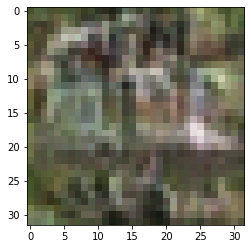

tf.Tensor(
[[0.0271658  0.09091742 0.01004905 0.09991866 0.06670142 0.0393464
  0.10488144 0.02933148 0.12479549 0.4068929 ]], shape=(1, 10), dtype=float32)
Step: 1, Loss: 2.0810790061950684


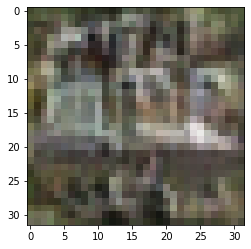

tf.Tensor(
[[0.07676134 0.0612167  0.01320228 0.04891135 0.02563016 0.0350096
  0.01211905 0.04963789 0.33998045 0.33753124]], shape=(1, 10), dtype=float32)
Step: 2, Loss: 1.0788671970367432


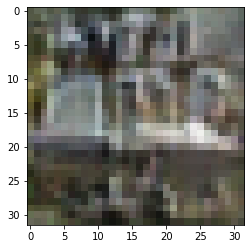

tf.Tensor(
[[3.0255418e-02 8.6984888e-04 1.1924626e-03 1.6397839e-04 2.3187830e-03
  1.6128487e-04 1.6774013e-04 1.1449595e-03 9.5528156e-01 8.4440280e-03]], shape=(1, 10), dtype=float32)
Step: 3, Loss: 0.045749157667160034


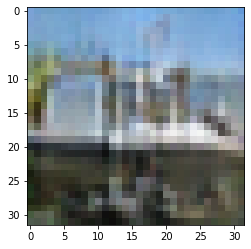

tf.Tensor(
[[1.09122306e-01 1.14763540e-03 8.41393077e-04 1.44321602e-04
  1.64927123e-03 1.21098623e-04 8.62246452e-05 6.58139645e-04
  8.72021139e-01 1.42084584e-02]], shape=(1, 10), dtype=float32)
Step: 4, Loss: 0.1369415521621704


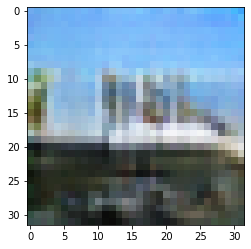

tf.Tensor(
[[3.6471158e-02 1.6288622e-04 2.4847100e-03 6.8812493e-05 1.8927263e-03
  2.1885704e-05 2.2536663e-04 8.4432046e-04 9.5482409e-01 3.0040373e-03]], shape=(1, 10), dtype=float32)
Step: 5, Loss: 0.04622815549373627


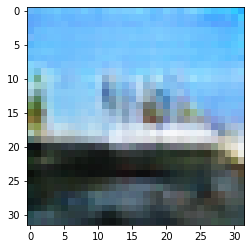

tf.Tensor(
[[7.75776710e-03 4.49705287e-04 4.03767073e-04 1.92187581e-05
  3.65932559e-04 1.98442067e-05 1.02385784e-04 2.51792750e-04
  9.90507722e-01 1.21868332e-04]], shape=(1, 10), dtype=float32)
Step: 6, Loss: 0.00953761674463749


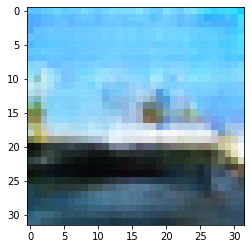

tf.Tensor(
[[2.3377525e-02 2.5726063e-03 4.9178977e-04 5.5030876e-05 9.8284683e-04
  2.4018682e-05 1.0591497e-04 3.1309019e-04 9.7192961e-01 1.4749022e-04]], shape=(1, 10), dtype=float32)
Step: 7, Loss: 0.028471771627664566


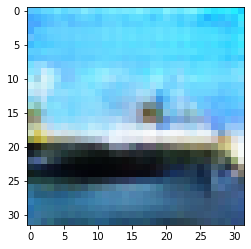

tf.Tensor(
[[1.4050978e-02 2.6593384e-04 6.8713323e-04 6.6442510e-05 6.6757738e-04
  2.3113358e-05 1.2363581e-04 1.6865024e-04 9.8391497e-01 3.1609696e-05]], shape=(1, 10), dtype=float32)
Step: 8, Loss: 0.016215797513723373


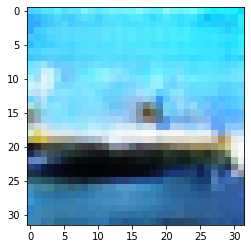

tf.Tensor(
[[9.99420788e-03 1.15722854e-04 4.38789139e-04 2.12960895e-05
  4.00350895e-04 1.00194438e-05 5.39005669e-05 6.58343488e-05
  9.88884687e-01 1.51686672e-05]], shape=(1, 10), dtype=float32)
Step: 9, Loss: 0.011177489534020424


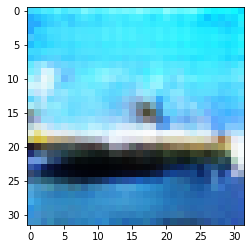

tf.Tensor(
[[1.3648994e-02 1.0293152e-04 2.9760145e-04 1.5653319e-05 2.9492861e-04
  8.0847785e-06 3.2839391e-05 6.3446452e-05 9.8552161e-01 1.4001708e-05]], shape=(1, 10), dtype=float32)
Step: 10, Loss: 0.014584341086447239


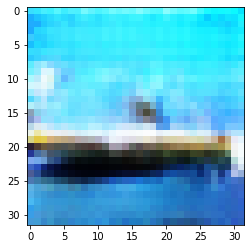

tf.Tensor(
[[1.5126119e-02 9.2979419e-05 2.8570110e-04 1.3179729e-05 3.7400678e-04
  9.0094463e-06 2.8001023e-05 5.9633167e-05 9.8399341e-01 1.7964576e-05]], shape=(1, 10), dtype=float32)
Step: 11, Loss: 0.016136078163981438


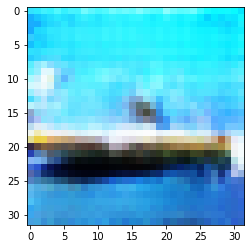

tf.Tensor(
[[1.3589775e-02 1.0473814e-04 2.4860731e-04 1.1384075e-05 3.0847435e-04
  7.7710874e-06 2.1865002e-05 4.7131263e-05 9.8564249e-01 1.7706008e-05]], shape=(1, 10), dtype=float32)
Step: 12, Loss: 0.014461513608694077


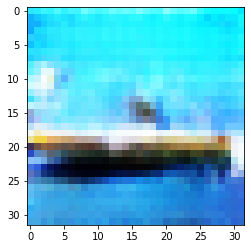

tf.Tensor(
[[1.1265354e-02 1.0379664e-04 2.0502933e-04 9.4809748e-06 2.4303363e-04
  6.1615210e-06 1.6538632e-05 3.5674519e-05 9.8810053e-01 1.4335955e-05]], shape=(1, 10), dtype=float32)
Step: 13, Loss: 0.01197077613323927


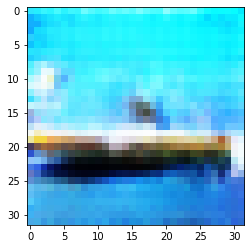

tf.Tensor(
[[9.3471603e-03 9.9374964e-05 1.7827837e-04 8.5304800e-06 2.1794286e-04
  5.0190879e-06 1.5889353e-05 2.8528128e-05 9.9008602e-01 1.3243943e-05]], shape=(1, 10), dtype=float32)
Step: 14, Loss: 0.009963451884686947


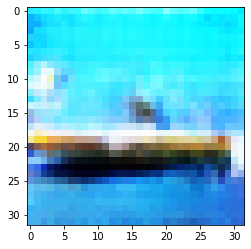

tf.Tensor(
[[7.9031400e-03 9.0343834e-05 1.5365558e-04 7.7605710e-06 1.8108056e-04
  4.0881414e-06 1.5073224e-05 2.3553330e-05 9.9161059e-01 1.0765621e-05]], shape=(1, 10), dtype=float32)
Step: 15, Loss: 0.008424922823905945


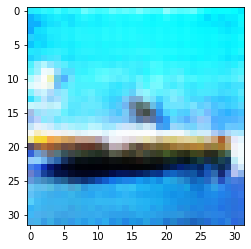

tf.Tensor(
[[7.7953814e-03 8.8781446e-05 1.5236830e-04 7.3546930e-06 1.6432496e-04
  3.7822088e-06 1.5559437e-05 2.1280252e-05 9.9174154e-01 9.6684662e-06]], shape=(1, 10), dtype=float32)
Step: 16, Loss: 0.00829275231808424


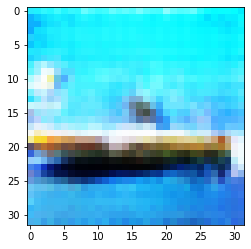

tf.Tensor(
[[8.0345292e-03 8.9713147e-05 1.5792306e-04 6.9673342e-06 1.5331498e-04
  3.6409369e-06 1.6451442e-05 2.1541218e-05 9.9150676e-01 9.2766977e-06]], shape=(1, 10), dtype=float32)
Step: 17, Loss: 0.008529637940227985


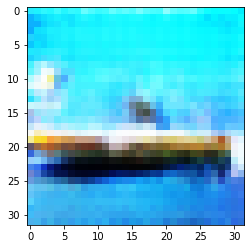

tf.Tensor(
[[8.2925223e-03 9.0504218e-05 1.6995778e-04 6.7401847e-06 1.4868863e-04
  3.5641206e-06 1.7495933e-05 2.2500861e-05 9.9123877e-01 9.2352329e-06]], shape=(1, 10), dtype=float32)
Step: 18, Loss: 0.008799832314252853


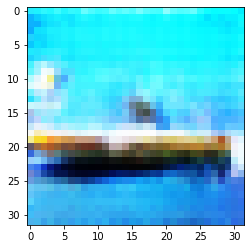

tf.Tensor(
[[8.3208587e-03 9.2024842e-05 1.7304459e-04 6.6277098e-06 1.4796757e-04
  3.5963303e-06 1.8576708e-05 2.3662216e-05 9.9120432e-01 9.3876961e-06]], shape=(1, 10), dtype=float32)
Step: 19, Loss: 0.008834589272737503


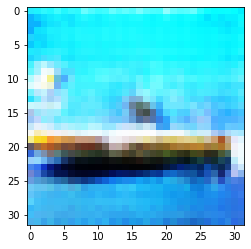

tf.Tensor(
[[8.0419676e-03 9.0980633e-05 1.7206460e-04 6.5527111e-06 1.4456621e-04
  3.6368519e-06 1.9482555e-05 2.4464674e-05 9.9148679e-01 9.5144824e-06]], shape=(1, 10), dtype=float32)
Step: 20, Loss: 0.008549656718969345


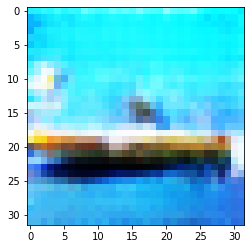

tf.Tensor(0.008549657, shape=(), dtype=float32)


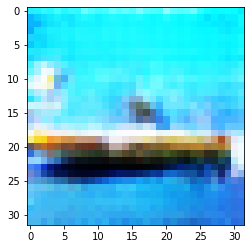

In [16]:
# TODO: a keresést egyszerre több elemre végezni, hogy ne egymás után kelljen

# Strukturált adat
input_data = {
    "airplane": 0.0,
    "automobile": 0.0,
    "bird": 0.0,
    "cat": 0.0,
    "deer": 0.0,
    "dog": 0.0,
    "frog": 0.0,
    "horse": 0.0,
    "ship": 1.0,
    "truck": 0.0
}

# Visszakeresés a valószínűségi értékek alapján
goal_prediction = make_onehot_from_dict(input_data)

#starting_noise = tf.random.uniform([1, latent_dim], minval=-2, maxval=2)
starting_noise = tf.random.normal([1, latent_dim])
#starting_noise = tf.random.truncated_normal([1, latent_dim])
#starting_noise = result_noises[-1]
step_size = 0.05
momentum = 0.8

n_steps = 21

result_noises, losses, preds =\
    gradient_descent_momentum(goal_prediction, starting_noise, step_size, momentum, n_steps, verbose=True)

print(losses[-1])
generated_image = generator(result_noises[-1], training=False)[0]
plt.imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
plt.show()

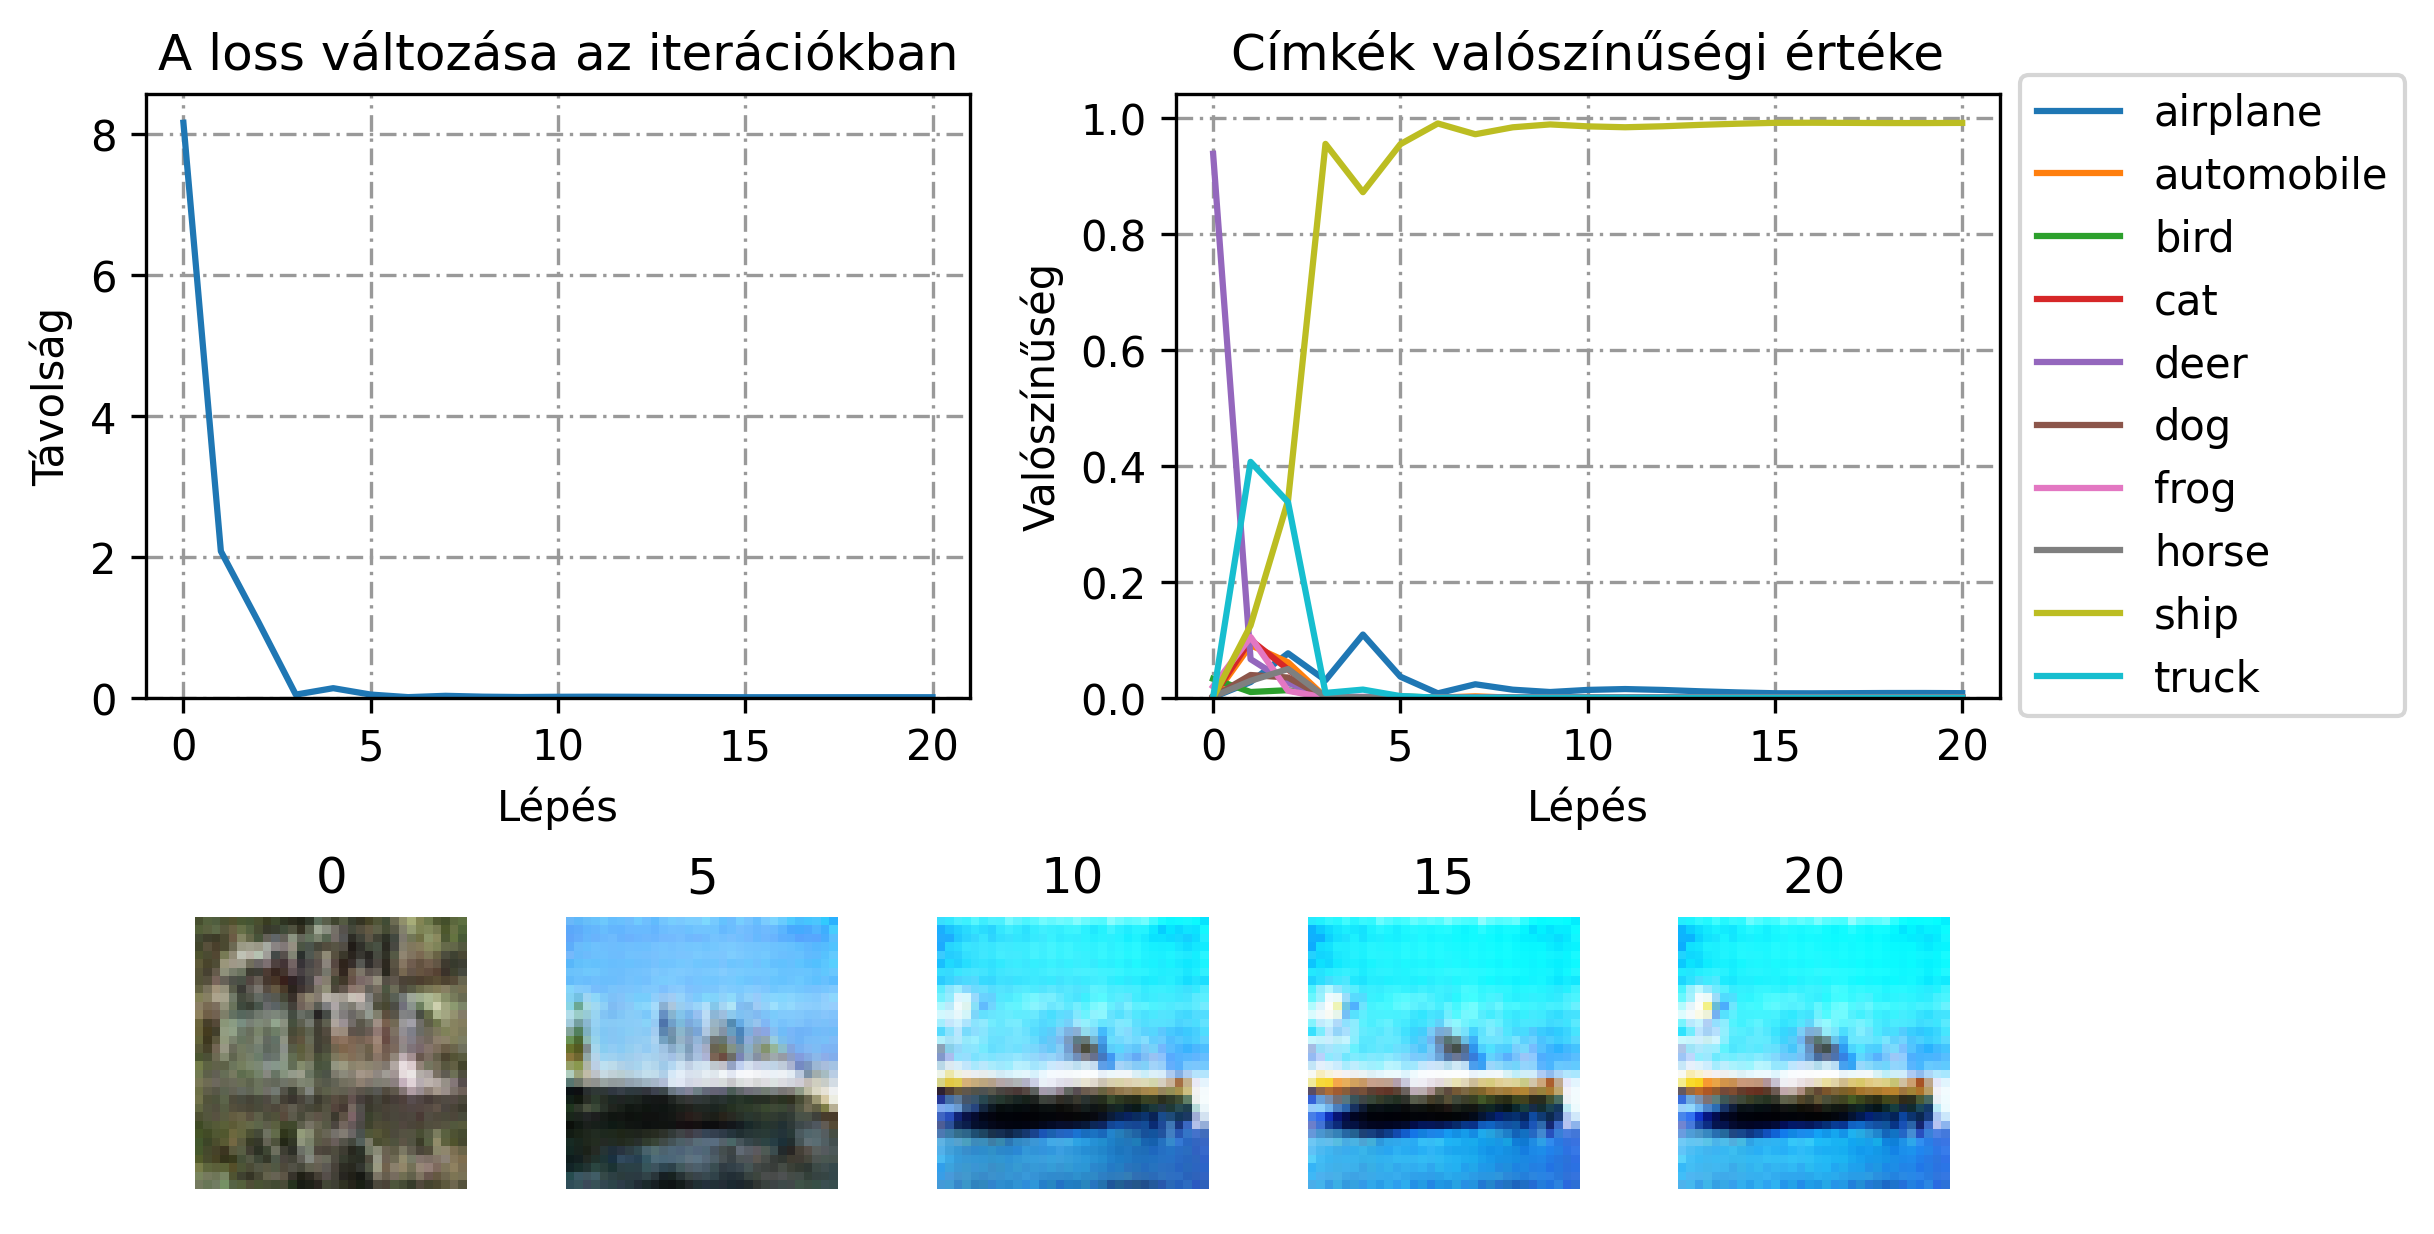

In [17]:
fig = plt.figure(figsize=(8, 4), dpi=300, constrained_layout=True)
axs = fig.subplot_mosaic([['Losses', 'Classes'],['Images', 'Images']],
                          gridspec_kw={'width_ratios':[2, 2], 'height_ratios':[2, 1]})
axs['Losses'].set_xlabel('Lépés')
axs['Losses'].set_ylabel('Távolság')
axs['Losses'].set_title('A loss változása az iterációkban')
axs['Losses'].grid(True, color='0.6', dashes=(5, 2, 1, 2))
axs['Losses'].plot(losses)
axs['Losses'].set_ylim(bottom=0)

axs['Classes'].set_ylabel('Valószínűség')
axs['Classes'].set_xlabel('Lépés')
axs['Classes'].set_title('Címkék valószínűségi értéke')

axs['Classes'].grid(True, color='0.6', dashes=(5, 2, 1, 2))

axs['Classes'].plot(preds, label=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])

axs['Classes'].set_ylim(bottom=0)
axs['Classes'].legend(loc='center left', bbox_to_anchor=(1, 0.5))

inserted = []
axs['Images'].axis('off')
pad = 0.01
inserted.append(axs['Images'].inset_axes([0.0, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.2, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.4, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.6, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.8, 0.05, 0.2, 0.9]))

for i in range(5):
    generated_image = generator(result_noises[i*5], training=False)[0]
    inserted[i].axis('off')
    inserted[i].set_title(i*5)
    inserted[i].imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
plt.show()

In [18]:
# Egy kutya és egy macska keresése, majd interpoláció a kettő között:

# Strukturált adat
input_data = {
    "airplane": 0.0,
    "automobile": 0.0,
    "bird": 0.0,
    "cat": 0.0,
    "deer": 0.0,
    "dog": 1.0,
    "frog": 0.0,
    "horse": 0.0,
    "ship": 0.0,
    "truck": 0.0
}

# Visszakeresés a valószínűségi értékek alapján
dog_label = make_onehot_from_dict(input_data)

# Strukturált adat
input_data = {
    "airplane": 0.0,
    "automobile": 0.0,
    "bird": 0.0,
    "cat": 1.0,
    "deer": 0.0,
    "dog": 0.0,
    "frog": 0.0,
    "horse": 0.0,
    "ship": 0.0,
    "truck": 0.0
}

# Visszakeresés a valószínűségi értékek alapján
cat_label = make_onehot_from_dict(input_data)

starting_noise = tf.random.normal([1, latent_dim])
dog_noise, _, _ =\
        gradient_descent_momentum(dog_label, starting_noise, 0.03, 0.8, 20, verbose=False)

starting_noise = tf.random.normal([1, latent_dim])
cat_noise, _, _ =\
        gradient_descent_momentum(cat_label, starting_noise, 0.03, 0.8, 20, verbose=False)

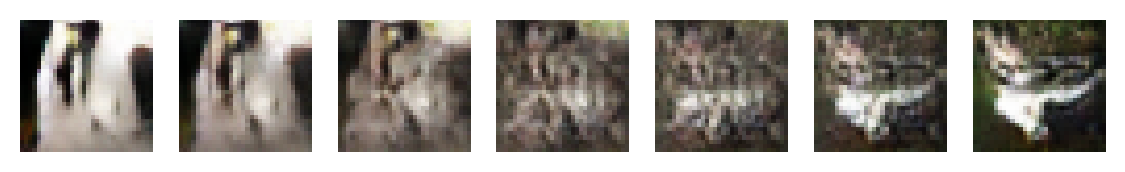

In [19]:
from scipy.interpolate import interp1d
import numpy as np

step_size = 8
linfit = interp1d([1, step_size], np.vstack([dog_noise[-1], cat_noise[-1]]), axis=0)

res = []
for j in range(1,step_size):
    generated_image = generator(linfit(j).reshape(1, latent_dim), training=False)[0]
    res.append(generated_image)
        
fig, axes = plt.subplots(figsize=(len(res), 1), nrows=1, ncols=len(res), dpi=200)
for i in range(len(res)):
    gen_1 = res[i][0].numpy()*127.5+127.5
    axes[i].axis('off')
    axes[i].imshow((gen_1).astype("uint8"), interpolation='none')
plt.show()

2022-04-27 09:21:26.504161: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


0.05383487 0.0063965307


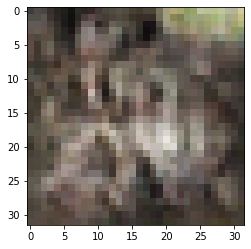

In [20]:
pon = 3

plt.imshow((res[pon][0].numpy()*127.5+127.5).astype("uint"))

result = inception_model.predict(res[pon])
print(result[0][3], result[0][5])

tf.Tensor(
[[2.7205078e-02 1.7049645e-04 1.2609351e-01 1.4555463e-01 4.1034707e-01
  3.1374011e-02 2.3007099e-01 2.8348651e-02 2.9011772e-04 5.4541905e-04]], shape=(1, 10), dtype=float32)
Step: 0, Loss: 6.119986534118652


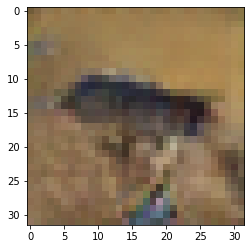

tf.Tensor(
[[0.10905521 0.00166462 0.04377222 0.2267725  0.20990176 0.09007471
  0.27207747 0.04257288 0.00044615 0.00366252]], shape=(1, 10), dtype=float32)
Step: 1, Loss: 4.777347564697266


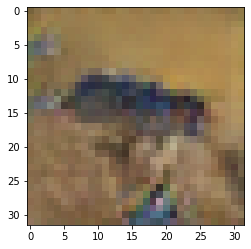

tf.Tensor(
[[0.62419873 0.00107201 0.07734311 0.05268551 0.1483821  0.02143387
  0.03902375 0.02313973 0.00540448 0.00731671]], shape=(1, 10), dtype=float32)
Step: 2, Loss: 5.302210330963135


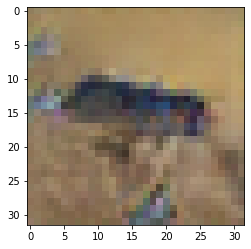

tf.Tensor(
[[0.09049533 0.008435   0.11418557 0.24777564 0.19088863 0.12284795
  0.14601918 0.06275448 0.00221346 0.01438473]], shape=(1, 10), dtype=float32)
Step: 3, Loss: 3.7719454765319824


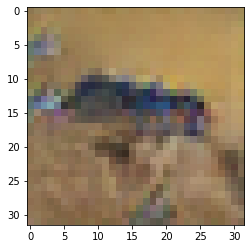

tf.Tensor(
[[0.17300755 0.00229005 0.08525123 0.33819276 0.05351144 0.30093637
  0.0165117  0.02521959 0.00084261 0.00423677]], shape=(1, 10), dtype=float32)
Step: 4, Loss: 4.879658222198486


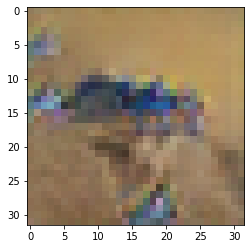

tf.Tensor(
[[0.4961425  0.00059083 0.42009947 0.01423775 0.02403069 0.01711935
  0.01815271 0.00709572 0.00089505 0.0016359 ]], shape=(1, 10), dtype=float32)
Step: 5, Loss: 6.191123962402344


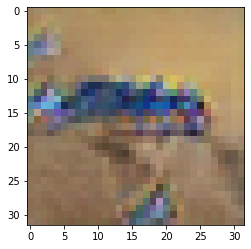

tf.Tensor(
[[0.02266807 0.0015742  0.23406658 0.55820495 0.01252841 0.08358921
  0.06997709 0.01495569 0.00075969 0.00167605]], shape=(1, 10), dtype=float32)
Step: 6, Loss: 5.328334331512451


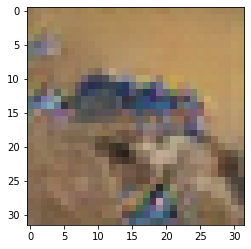

tf.Tensor(
[[0.01047749 0.00929391 0.2702113  0.08352983 0.0543366  0.11224236
  0.14281403 0.31121847 0.00227145 0.00360457]], shape=(1, 10), dtype=float32)
Step: 7, Loss: 2.922828197479248


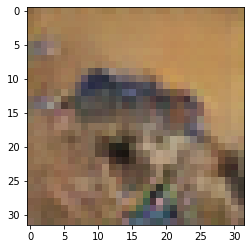

tf.Tensor(
[[0.00627671 0.00100164 0.15424506 0.11201738 0.03752254 0.37897277
  0.2392147  0.06851486 0.00058464 0.00164962]], shape=(1, 10), dtype=float32)
Step: 8, Loss: 4.793412208557129


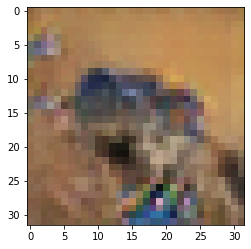

tf.Tensor(
[[3.9551137e-03 1.3588453e-03 1.0099489e-01 6.0081948e-02 5.3913999e-02
  1.0112079e-01 6.3337278e-01 4.3691803e-02 8.8227546e-04 6.2751817e-04]], shape=(1, 10), dtype=float32)
Step: 9, Loss: 4.865857124328613


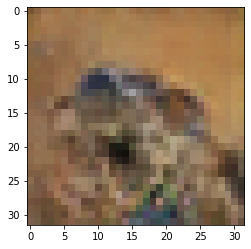

tf.Tensor(
[[2.49001011e-03 3.26320762e-04 5.38067929e-02 1.07513294e-01
  2.80703194e-02 5.94784319e-01 1.54108554e-01 5.85972108e-02
  1.81603798e-04 1.21587684e-04]], shape=(1, 10), dtype=float32)
Step: 10, Loss: 5.43234920501709


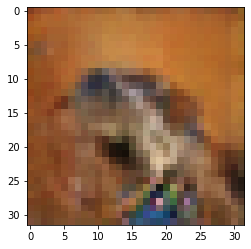

tf.Tensor(
[[3.1113884e-04 2.6325948e-04 4.3392822e-02 2.4337502e-02 2.5880099e-03
  8.8839710e-01 2.7646797e-02 1.2965750e-02 4.1697738e-05 5.5872923e-05]], shape=(1, 10), dtype=float32)
Step: 11, Loss: 6.293907165527344


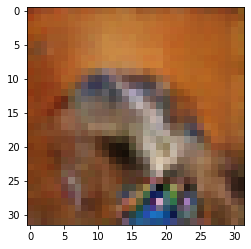

tf.Tensor(
[[1.7854330e-03 4.4098622e-04 7.4370033e-01 7.3942453e-02 1.4213505e-02
  3.4602810e-02 1.2737173e-01 2.7093079e-03 1.0915892e-03 1.4185724e-04]], shape=(1, 10), dtype=float32)
Step: 12, Loss: 6.818779945373535


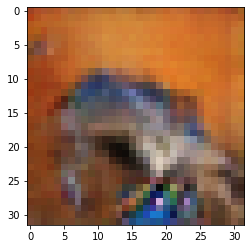

tf.Tensor(
[[1.0719255e-03 2.8069614e-04 5.8860653e-03 2.7113992e-01 1.1019118e-02
  2.5566733e-01 3.7428331e-01 8.0346875e-02 1.3269526e-04 1.7212162e-04]], shape=(1, 10), dtype=float32)
Step: 13, Loss: 5.349820137023926


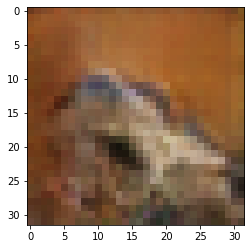

tf.Tensor(
[[0.00893383 0.00111835 0.01945804 0.4384885  0.03536306 0.10362497
  0.20086342 0.18937255 0.00118862 0.00158865]], shape=(1, 10), dtype=float32)
Step: 14, Loss: 4.229969501495361


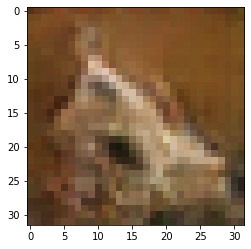

tf.Tensor(
[[0.00808387 0.00357702 0.07516158 0.21155931 0.06884101 0.20175783
  0.26701158 0.16007313 0.00172067 0.00221409]], shape=(1, 10), dtype=float32)
Step: 15, Loss: 3.7326748371124268


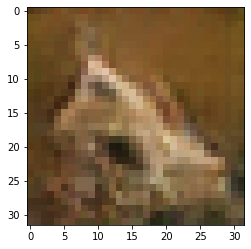

tf.Tensor(
[[0.00579981 0.00598083 0.07124965 0.16575125 0.16778573 0.17942166
  0.2647222  0.13633983 0.00097411 0.00197483]], shape=(1, 10), dtype=float32)
Step: 16, Loss: 3.5558998584747314


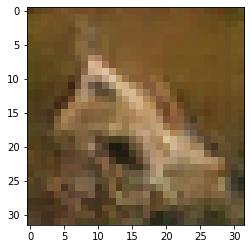

tf.Tensor(
[[0.0049125  0.00780362 0.0441246  0.15614201 0.16426857 0.1837184
  0.2578082  0.17877117 0.00091045 0.00154042]], shape=(1, 10), dtype=float32)
Step: 17, Loss: 3.2874081134796143


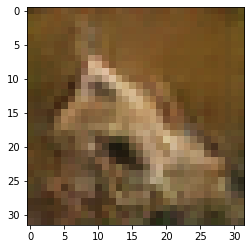

tf.Tensor(
[[0.0049983  0.00893618 0.05040043 0.17756148 0.13343431 0.30222994
  0.10682829 0.21163005 0.00162971 0.00235147]], shape=(1, 10), dtype=float32)
Step: 18, Loss: 3.135281562805176


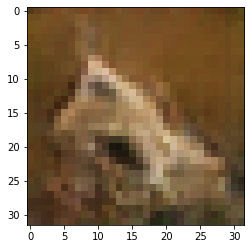

tf.Tensor(
[[0.0059408  0.0080856  0.04095574 0.15768717 0.13492516 0.1920202
  0.12472308 0.33109924 0.00202376 0.00253921]], shape=(1, 10), dtype=float32)
Step: 19, Loss: 2.961503505706787


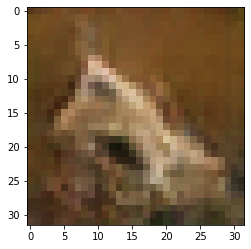

In [21]:
# Mixelt label-ök súly szerint

input_data = {
    "airplane": 0.0,
    "automobile": 0.5,
    "bird": 0.0,
    "cat": 0.0,
    "deer": 0.0,
    "dog": 0.0,
    "frog": 0.0,
    "horse": 0.5,
    "ship": 0.0,
    "truck": 0.0
}

# Visszakeresés a valószínűségi értékek alapján
mixed_label = make_onehot_from_dict(input_data)

starting_noise = tf.random.truncated_normal([1, latent_dim])
mixed_noise, _, _ =\
        gradient_descent_momentum(mixed_label, starting_noise, 0.05, 0.5, 20, verbose=True)